## ***Import de bibliotecas***

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ***Merge dos dois dataframes***

In [58]:
# Lê o arquivo 'medianotas.csv' para o DataFrame 'notas'.
# Este DataFrame deve conter informações sobre médias de notas por município.
notas = pd.read_csv('medianotas.csv')

# Lê o arquivo compactado 'mundo_onu_adh_municipio.csv.gz' para o DataFrame 'indices_municipios'.
# Este DataFrame deve conter índices socioeconômicos (como IDH) por município, identificados por 'id_municipio'.
indices_municipios = pd.read_csv('mundo_onu_adh_municipio.csv.gz')

# Lê o arquivo compactado 'br_bd_diretorios_brasil_municipio.csv.gz' para o DataFrame 'tradutor'.
# Este DataFrame serve como uma tabela de referência para mapear 'id_municipio' ao nome do município.
tradutor = pd.read_csv('br_bd_diretorios_brasil_municipio.csv.gz')

# Seleciona apenas as colunas 'id_municipio' e 'nome' do DataFrame 'tradutor'.
# Isso cria um DataFrame menor, 'tradutor_idmunicipio', focado no mapeamento ID-nome.
tradutor_idmunicipio = tradutor[['id_municipio','nome']]

# Realiza a junção (merge) entre 'indices_municipios' e 'tradutor_idmunicipio'.
# A junção é feita usando a coluna 'id_municipio' como chave.
# 'how='outer'' garante que todos os municípios de ambas as tabelas sejam incluídos.
# O resultado é 'indices_traduzido', que agora contém o nome do município junto com seus índices.
indices_traduzido = pd.merge(indices_municipios, tradutor_idmunicipio, on='id_municipio', how='outer')

# Padroniza os nomes dos municípios para letras minúsculas para evitar problemas de correspondência.
# Cria a coluna 'nome_municipio' em 'indices_traduzido' com os nomes dos municípios em minúsculas.
indices_traduzido['nome_municipio'] = indices_traduzido['nome'].str.lower()

# Cria a coluna 'nome_municipio' em 'notas' com os nomes dos municípios (da coluna 'NO_MUNICIPIO_ESC') em minúsculas.
notas['nome_municipio'] = notas['NO_MUNICIPIO_ESC'].str.lower()

# Realiza a junção (merge) entre 'indices_traduzido' e 'notas'.
# A junção é feita usando a coluna 'nome_municipio' como chave.
# 'how='left'' mantém todas as linhas de 'indices_traduzido' (tabela da esquerda)
# e adiciona as colunas de 'notas' onde há correspondência.
# O DataFrame resultante, 'notas_indices_df', contém os dados consolidados.
notas_indices_df = pd.merge(indices_traduzido, notas, on='nome_municipio', how='left')

# Remove as colunas originais de nomes de municípios ('nome' e 'NO_MUNICIPIO_ESC')
# pois a informação já está consolidada e padronizada em 'nome_municipio'.
notas_indices_df = notas_indices_df.drop(columns=['nome', 'NO_MUNICIPIO_ESC'])

# Primeiro, obtém a lista atual de colunas.
cols = notas_indices_df.columns.tolist()
# Remove 'nome_municipio' da lista e a insere na primeira posição (índice 0).
cols.insert(0, cols.pop(cols.index('nome_municipio')))
# Reordena o DataFrame 'notas_indices_df' com a nova lista de colunas.
notas_indices_df = notas_indices_df[cols]

# Exibe as primeiras linhas do DataFrame 'notas_indices_df' para inspeção.
print(notas_indices_df.head())

          nome_municipio     ano  id_municipio  expectativa_vida  \
0  alta floresta d'oeste  1991.0       1100015             62.01   
1  alta floresta d'oeste  2000.0       1100015             66.90   
2  alta floresta d'oeste  2010.0       1100015             70.75   
3              ariquemes  1991.0       1100023             66.02   
4              ariquemes  2000.0       1100023             69.52   

   fecundidade_total  mortalidade_1  mortalidade_5  razao_dependencia  \
0               4.08          45.58          58.05              73.50   
1               3.11          28.36          33.96              61.65   
2               2.24          23.80          25.49              47.37   
3               3.72          32.39          41.41              69.97   
4               2.77          21.68          25.99              59.88   

   prob_sobrevivencia_40  prob_sobrevivencia_60  ...  pia_10_14  pia_15_17  \
0                  83.81                  66.87  ...        NaN        NaN

## ***Retirando valores nulos e outliers***

In [59]:
#Toma-se informações gerais do DataFrame
notas_indices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Columns: 232 entries, nome_municipio to nota
dtypes: float64(230), int64(1), object(1)
memory usage: 29.6+ MB


In [60]:
# Checa-se a quantidade de valores números por coluna
notas_indices_df.isna().sum()

nome_municipio          0
ano                     5
id_municipio            0
expectativa_vida        5
fecundidade_total       5
                     ... 
idhm                    5
idhm_e                  5
idhm_l                  5
idhm_r                  5
nota                 7317
Length: 232, dtype: int64

In [61]:
#Tira todas as linhas que possuem valores nulos
df_notas = notas_indices_df.dropna()
df_notas.isna().sum()

nome_municipio       0
ano                  0
id_municipio         0
expectativa_vida     0
fecundidade_total    0
                    ..
idhm                 0
idhm_e               0
idhm_l               0
idhm_r               0
nota                 0
Length: 232, dtype: int64

In [62]:
# Tira os outliers de nota do DataFrame
df_notas = df_notas[(df_notas['nota'] >= 350) & (df_notas['nota'] <=700)]


In [63]:
# Ver apenas colunas numéricas
colunas_numericas = df_notas.select_dtypes(include='number')
colunas_numericas.head()


,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r,nota
2,2010.0,1100015,70.75,2.24,23.8,25.49,47.37,94.50,83.18,5.84,...,2401.0,1602.0,16431.0,0.368,0.629,0.641,0.526,0.763,0.657,529.808675
5,2010.0,1100023,73.36,1.91,19.2,20.53,46.68,96.12,87.69,4.36,...,9256.0,5256.0,60213.0,0.514,0.648,0.702,0.600,0.806,0.716,534.279751
8,2010.0,1100031,70.39,2.15,24.8,26.58,48.12,94.27,82.57,6.87,...,604.0,381.0,4306.0,0.357,0.700,0.650,0.559,0.757,0.650,418.885714
11,2010.0,1100049,74.27,1.90,14.3,15.38,43.79,96.41,88.56,5.57,...,7473.0,4547.0,54356.0,0.488,0.698,0.718,0.620,0.821,0.727,527.148139
14,2010.0,1100056,72.94,2.12,18.1,19.42,45.67,95.78,86.72,6.44,...,1635.0,1033.0,11786.0,0.430,0.712,0.692,0.602,0.799,0.688,524.341481


## ***Seleção de colunas relevantes***

In [ ]:
#Seleciona-se as colunas mais relevantes do dataset
colunas_selecionadas = [
    'nome_municipio',
    'id_municipio',
    'ano',
    'nota',
    'idhm',
    'idhm_e',
    'idhm_l',
    'idhm_r',
    'expectativa_vida',
    'mortalidade_1',
    'expectativa_anos_estudo',
    'taxa_analfabetismo_15_mais',
    'indice_escolaridade',
    'indice_frequencia_escolar',
    'renda_pc',
    'indice_gini',
    'prop_pobreza',
    'taxa_desocupacao',
    'prop_ocupados_formalizacao',
    'taxa_agua_encanada',
    'taxa_coleta_lixo',
    'taxa_energia_eletrica',
    'populacao'
]

#Subseta o dataset original para abranger apenas as colunas selecionadas
df_notas = df_notas[colunas_selecionadas]

df_notas

,nome_municipio,id_municipio,ano,nota,idhm,idhm_e,idhm_l,idhm_r,expectativa_vida,mortalidade_1,...,indice_frequencia_escolar,renda_pc,indice_gini,prop_pobreza,taxa_desocupacao,prop_ocupados_formalizacao,taxa_agua_encanada,taxa_coleta_lixo,taxa_energia_eletrica,populacao
2,alta floresta d'oeste,1100015,2010.0,529.808675,0.641,0.526,0.763,0.657,70.75,23.80,...,0.629,476.99,0.58,26.04,6.07,41.68,93.69,94.05,93.98,24392.0
5,ariquemes,1100023,2010.0,534.279751,0.702,0.600,0.806,0.716,73.36,19.20,...,0.648,689.95,0.53,11.54,5.11,52.81,98.54,96.72,98.58,90353.0
8,cabixi,1100031,2010.0,418.885714,0.650,0.559,0.757,0.650,70.39,24.80,...,0.700,457.17,0.51,21.20,2.90,39.38,95.49,99.14,96.36,6313.0
11,cacoal,1100049,2010.0,527.148139,0.718,0.620,0.821,0.727,74.27,14.30,...,0.698,738.06,0.57,13.08,6.28,55.07,97.96,98.17,98.89,78574.0
14,cerejeiras,1100056,2010.0,524.341481,0.692,0.602,0.799,0.688,72.94,18.10,...,0.712,577.18,0.50,13.70,5.72,45.54,97.53,91.89,98.85,17029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,trindade,5221403,2010.0,523.429564,0.699,0.608,0.822,0.682,74.30,11.78,...,0.665,558.61,0.42,7.02,6.67,54.96,99.08,98.84,99.92,104488.0
16672,trombas,5221452,2010.0,449.073333,0.653,0.547,0.812,0.628,73.71,15.00,...,0.658,398.01,0.52,25.49,7.67,28.07,88.53,91.75,96.26,3452.0
16681,uirapuru,5221577,2010.0,479.796923,0.670,0.579,0.822,0.632,74.29,14.20,...,0.718,409.38,0.44,16.44,2.88,31.41,97.59,99.07,94.85,2933.0
16687,uruana,5221700,2010.0,491.793000,0.703,0.634,0.824,0.665,74.42,14.00,...,0.775,500.27,0.46,13.89,5.97,26.28,95.87,98.64,99.59,13826.0


## ***Plotagem de Gráficos***

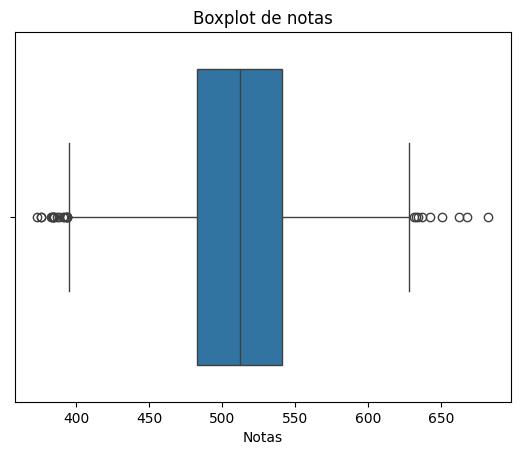

In [65]:
#Plota-se um boxplot das notas do DataFrame
sns.boxplot(data=df_notas, x='nota')
plt.xlabel('Notas')
plt.title('Boxplot de notas')
plt.show()

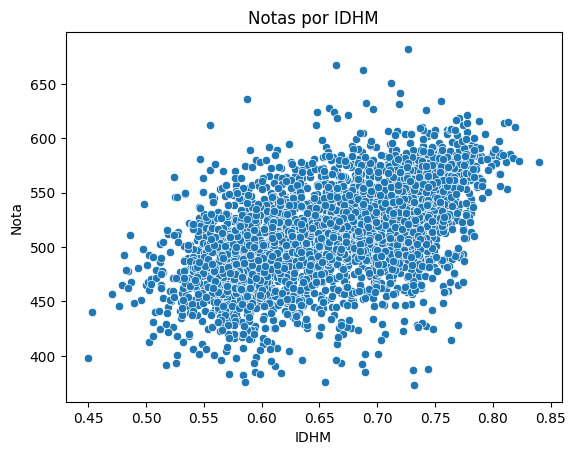

In [66]:
#Plota-se um scatterplot de notas por IDHM
import seaborn as sns
sns.scatterplot(data=df_notas, x='idhm', y='nota')
plt.xlabel('IDHM')
plt.ylabel('Nota')
plt.title('Notas por IDHM')
plt.show()

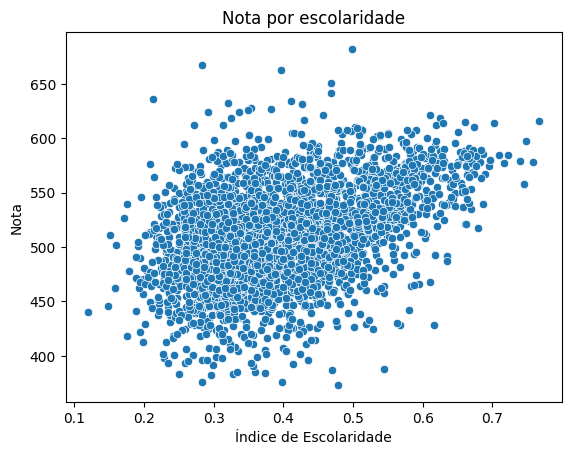

In [67]:
#Plota-se um scatterplot de notas por Índice de Escolaridade
sns.scatterplot(data=df_notas, x='indice_escolaridade', y='nota')
plt.xlabel('Índice de Escolaridade')
plt.ylabel('Nota')
plt.title('Nota por escolaridade')
plt.show()

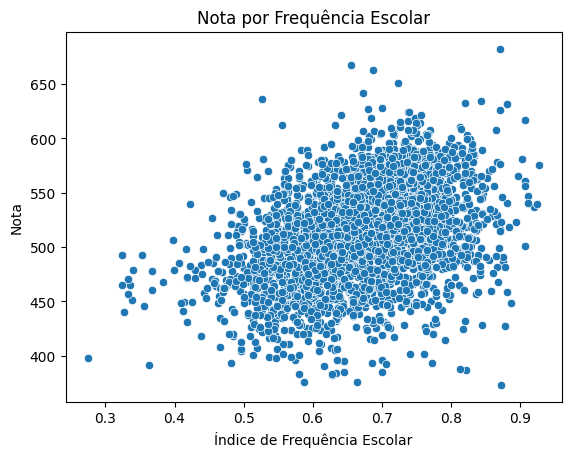

In [68]:
#Plota-se um scatterplot de notas por Índice de Frequência Escolar
sns.scatterplot(data=df_notas, x='indice_frequencia_escolar', y='nota')
plt.xlabel('Índice de Frequência Escolar')
plt.ylabel('Nota')
plt.title('Nota por Frequência Escolar')
plt.show()

## ***Correlações Baixas***

In [69]:

correlacoes = df_notas.corr(numeric_only=True)['nota'].drop('nota')  # Tira a própria 'nota' da análise

# Filtra correlações próximas de zero (baixas)
correlacoes_baixas = correlacoes[(correlacoes < 0.20) & (correlacoes > -0.20)]

# Ordena por valor absoluto (mais "fortes" entre as fracas)
top_corrs_baixas = correlacoes_baixas.reindex(correlacoes_baixas.abs().sort_values(ascending=False).index).head(7)

# Obtêm os nomes das colunas
colunas_baixa_corr = top_corrs_baixas.index.tolist()


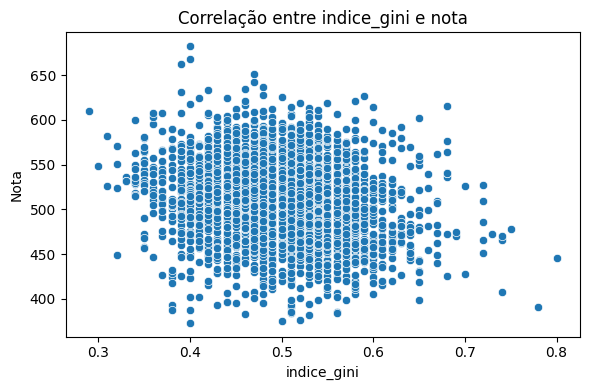

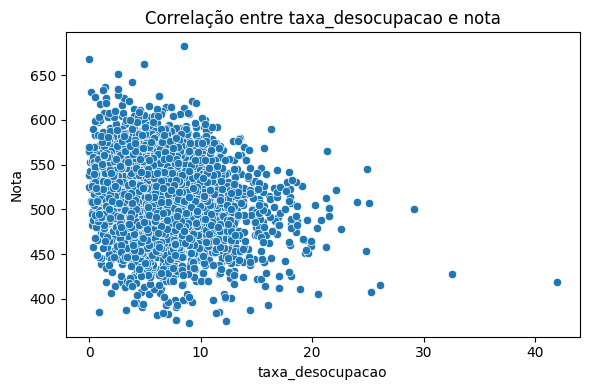

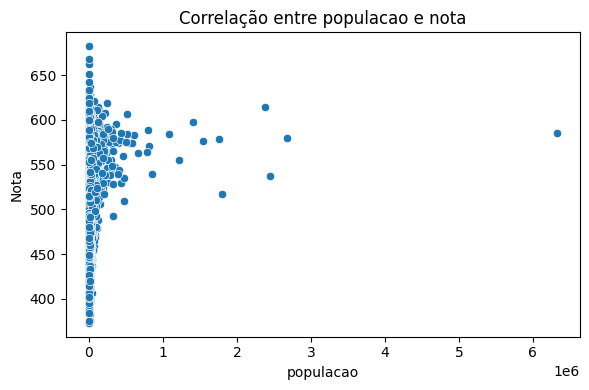

In [70]:
#Plota-se as 7 correlações mais fortes entre as fracas (Entre -0,2 e 0,2) em um Scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in colunas_baixa_corr:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_notas, x=coluna, y='nota')
        plt.title(f'Correlação entre {coluna} e nota')
        plt.xlabel(coluna)
        plt.ylabel('Nota')
        plt.tight_layout()
        plt.show()


## ***Correlações Altas***

In [71]:
correlacoes = df_notas.corr(numeric_only=True)['nota'].drop('nota')  # Tira a própria 'nota'

# Filtra as correlações mais "altas", ou seja, longe de zero
correlacoes_altas = correlacoes[(correlacoes >= 0.20) | (correlacoes <= -0.20)]

# Ordena por valor absoluto, do maior pro menor
top_corrs_altas = correlacoes_altas.reindex(correlacoes_altas.abs().sort_values(ascending=False).index).head(7)

# Obtêm os nomes das colunas
colunas_alta_corr = top_corrs_altas.index.tolist()


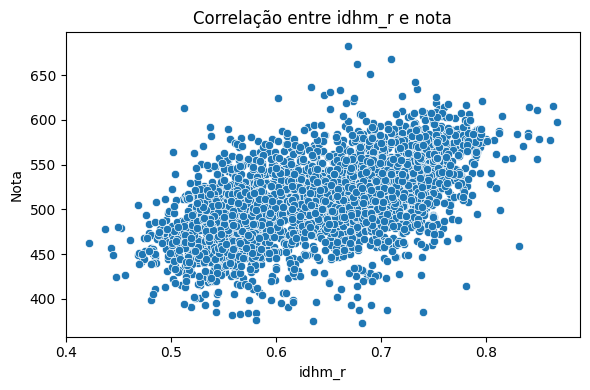

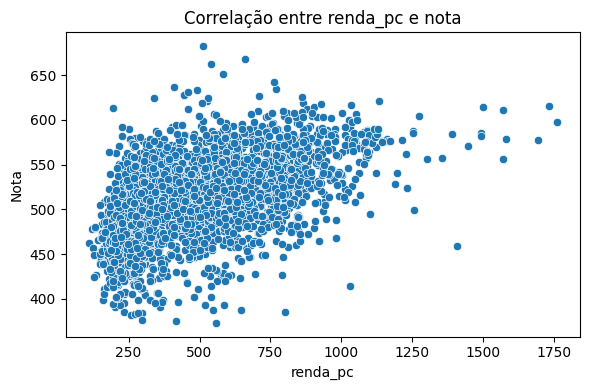

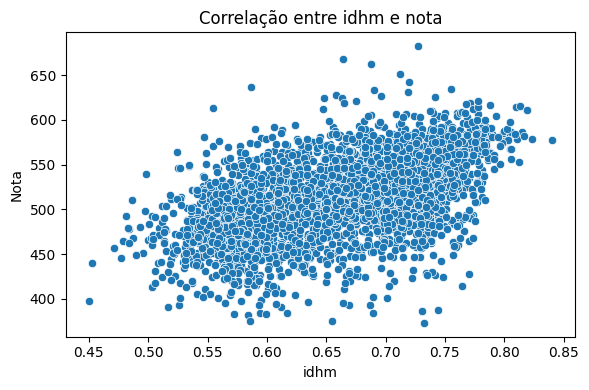

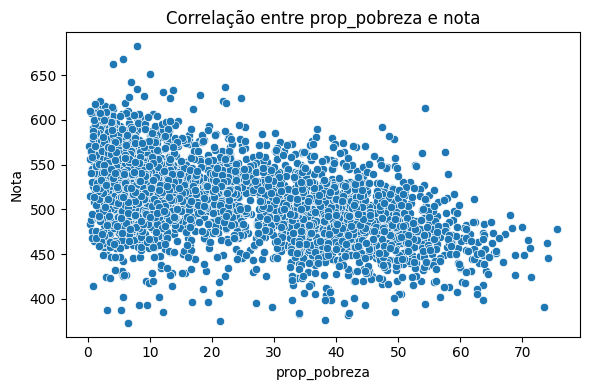

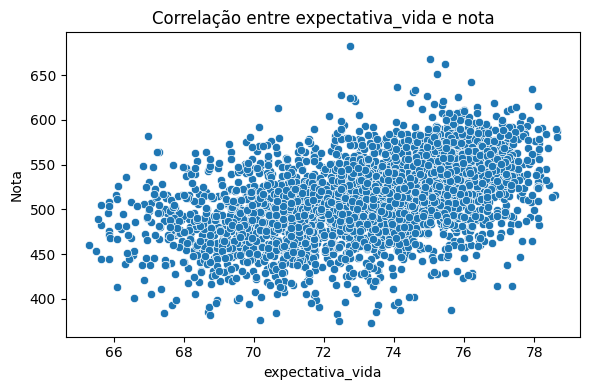

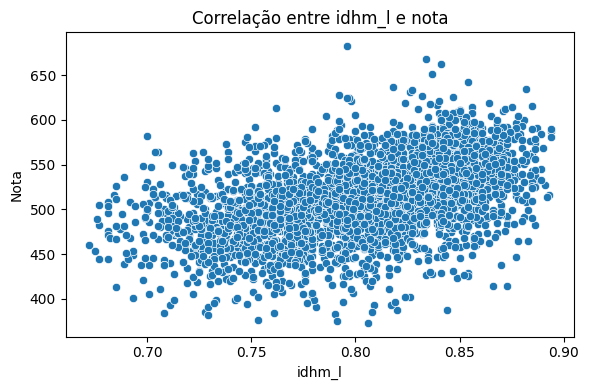

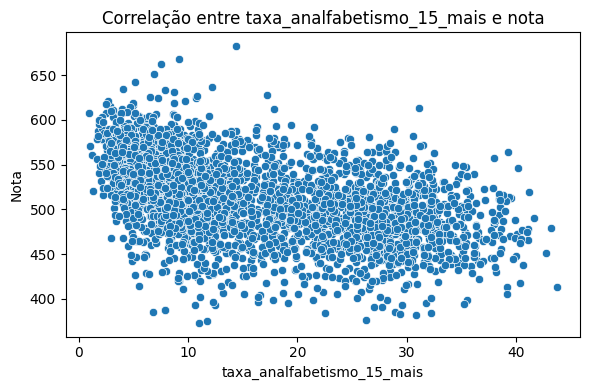

In [72]:
#Plota-se as 7 correlações mais fortes em um Scatterplot (tirando a correlação entre nota e nota)
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in colunas_alta_corr:
    if coluna != 'nota':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_notas, x=coluna, y='nota')
        plt.title(f'Correlação entre {coluna} e nota')
        plt.xlabel(coluna)
        plt.ylabel('Nota')
        plt.tight_layout()
        plt.show()


## ***Diferenças de notas entre municípios extremos***